# 2.3 Multiple Correspondency Analysis

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

### Encoding categorical data
____

This technique creates a map of the associations among categories of two or more categorical variables, this dimensionality reduction concerned the interrelationships amongst the variables. The goal is convert the numerical information from a contingency table into a two-dimensional graphical display.

Lets suppose we have a categorical dataset with n obervations and $C$ categoricals columns with $J_i$ possible values for each column $C_i$, then the indicator matrix $\textbf{X}$ have n rows with the sum of all possible $J_i$ the entrie $[\mathbf{X}]_{i,j}=1$ if the category of the j-th variable possessed by the i-th individual and 0 in other case, this encoding is well know as one hot encoding. **Example**:

$$
Dataset = 
\left[ \begin{array}{ccccc}
\textbf{Sex}  & \textbf{Smoke}  \\
\text{Male}  & \text{Yes}  \\
\text{Male}  & \text{No}  \\
\text{Male}  & \text{Yes}  \\
\text{Female}  & \text{No}  \\
\text{Female}  & \text{Yes}  \\
\text{Female}  & \text{No}  \\
\end{array} \right]
\quad
\mathbf{X} = 
\left[ \begin{array}{ccccc}
\textbf{Sex_Male} & \textbf{Sex_Female} & \textbf{Smoke_Yes} & \textbf{Smoke_No}\\
1 & 0 & 1 & 0 \\
1 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 \\
\end{array} \right]
$$

The Burt matrix is the matrix that contains the crossed counts of all categories:

$$\mathbf{B} = \mathbf{X'X}$$

For the last example:

$$
\mathbf{B} = \mathbf{X'X} =
\left[ \begin{array}{ccccc}
& \textbf{Sex_Male} & \textbf{Sex_Female} & \textbf{Smoke_Yes} & \textbf{Smoke_No}\\
\textbf{Sex_Male} & 3 & 0 & 2 & 1\\
\textbf{Sex_Female} & 0 & 3 & 1 & 2\\
\textbf{Smoke_Yes} & 2 & 1 & 3 & 0\\
\textbf{Smoke_Nes} & 1 & 2 & 0 & 3\\
\end{array} \right]
$$

The Burt matrix is semipositive define so it coud be factorized as 

$$\mathbf{B}=\mathbf{\Gamma \Lambda \Gamma'} \implies \mathbf{X}=\mathbf{U D \Gamma'}$$

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import prince as pr
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
pd.set_option('max_colwidth',100)
plt.style.use('seaborn')

In [5]:
run MvaUtils.py

In [9]:
categoricals = ['sex_numeric','cabin_numeric']
#categoricals = ['sex_numeric','cabin_numeric','companions']
titanic_df = pd.read_csv('DataSets/TitanicCleaned.csv').dropna()
titanic_df['companions'] = titanic_df['sibsp']+titanic_df['parch']
titanic_df['companions'] = titanic_df['companions'].apply(lambda row: 4 if row>=4 else row)
titanic_df['cabin_numeric'] = titanic_df['cabin_numeric'].apply(lambda row: 7 if row>=7 else row)

for col in categoricals:
    titanic_df[col] = titanic_df[col].apply(lambda row: str(row).replace('.0',''))
titanic_df[categoricals+['target']]

,sex_numeric,cabin_numeric,target
0,1,2,S
1,0,3,S
2,1,3,NS
3,0,3,NS
4,1,3,NS
...,...,...,...
1304,1,0,NS
1305,1,0,NS
1306,0,0,NS
1307,0,0,NS


In [11]:
ohe = OneHotEncoder(sparse=False).fit(titanic_df[categoricals])
ohe_col_names = ohe.get_feature_names(categoricals)
X_df = pd.DataFrame(ohe.transform(titanic_df[categoricals]),columns=ohe_col_names)
X_df

/home/eaguilar/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,sex_numeric_0,sex_numeric_1,cabin_numeric_0,cabin_numeric_1,cabin_numeric_2,cabin_numeric_3,cabin_numeric_4,cabin_numeric_5,cabin_numeric_6,cabin_numeric_7
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1302,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,category,mca_1,mca_2,mca_3,mca_4
0,sex_numeric_0,-0.567202,-9.324139e-17,1.049508e-16,1.613293e-16
1,sex_numeric_1,1.030498,1.431147e-16,7.010451e-16,2.289835e-16
2,cabin_numeric_0,-0.326144,-8.843140e-02,-3.038400e-02,-1.134430e-01
3,cabin_numeric_1,-1.637339,3.039100e+00,-2.388313e+00,2.784668e+00
4,cabin_numeric_2,1.745847,-3.986591e-01,1.152372e+00,-1.518115e+00
5,cabin_numeric_3,1.270123,-1.636257e+00,-1.332498e+00,7.317235e-02
6,cabin_numeric_4,1.370696,3.535513e+00,-5.102401e-01,-1.561848e+00
7,cabin_numeric_5,1.024824,-8.657772e-01,1.810748e+00,4.090284e+00
8,cabin_numeric_6,0.245241,2.276261e+00,5.490324e+00,7.061462e-01
9,cabin_numeric_7,4.521970,4.465782e+00,-5.009787e+00,5.307648e+00


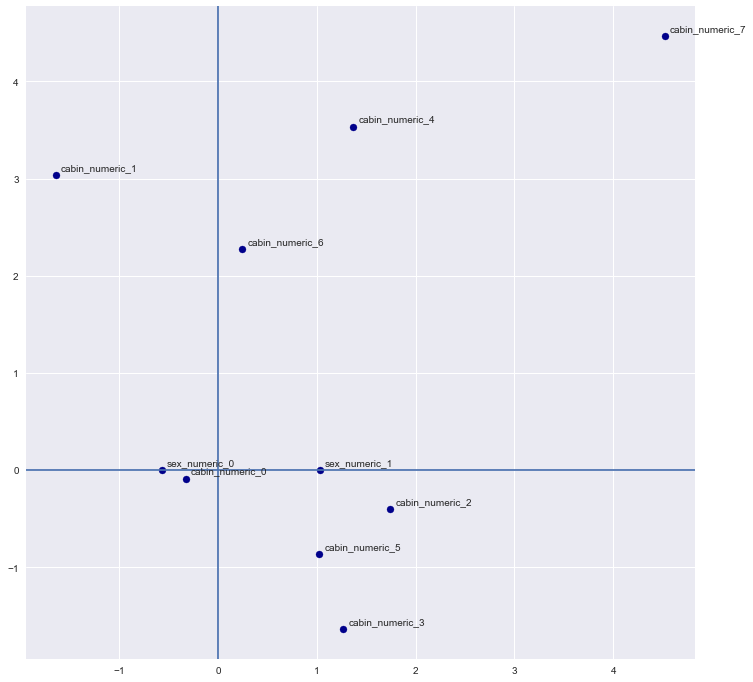

In [12]:
X = X_df
n_components = 4
mca_cols = ['mca_'+str(i+1) for i in range(0,n_components)]
mca_model = pr.MCA(n_components=n_components,
                   n_iter=10,
                   copy=True,
                   check_input=True,
                   engine='auto',
                   random_state=42).fit(X)

columns_profiles_df = mca_model.column_coordinates(X).reset_index()
columns_profiles_df.columns = ['category']+mca_cols

display(columns_profiles_df)
plt.figure(figsize=(12,12))

scatterPlot(plt,columns_profiles_df,'mca_1','mca_2',label='category')

mca_df = mca_model.row_coordinates(X)
mca_df.columns = mca_cols
mca_df['target'] = titanic_df['target']

In [6]:
[e/sum(mca_model.eigenvalues_) for e in mca_model.eigenvalues_ ]

[0.2979589563366047,
 0.24903835179433081,
 0.23243907884124917,
 0.2205636130278154]

,mca_1,mca_2,mca_3,mca_4,target
0,1.143293,-0.378709,0.278681,-1.249963,S
1,0.445642,0.304122,-0.077855,1.010965,S
2,0.886640,-0.428573,0.075762,1.010965,NS
3,0.445642,0.304122,-0.077855,1.010965,NS
4,0.886640,-0.428573,0.075762,1.010965,NS
...,...,...,...,...,...
1302,0.804134,-0.335018,-0.226754,-0.029914,NS
1303,0.804134,-0.335018,-0.226754,-0.029914,NS
1304,0.363137,0.397676,-0.380372,-0.029914,NS
1305,0.363137,0.397676,-0.380372,-0.029914,NS


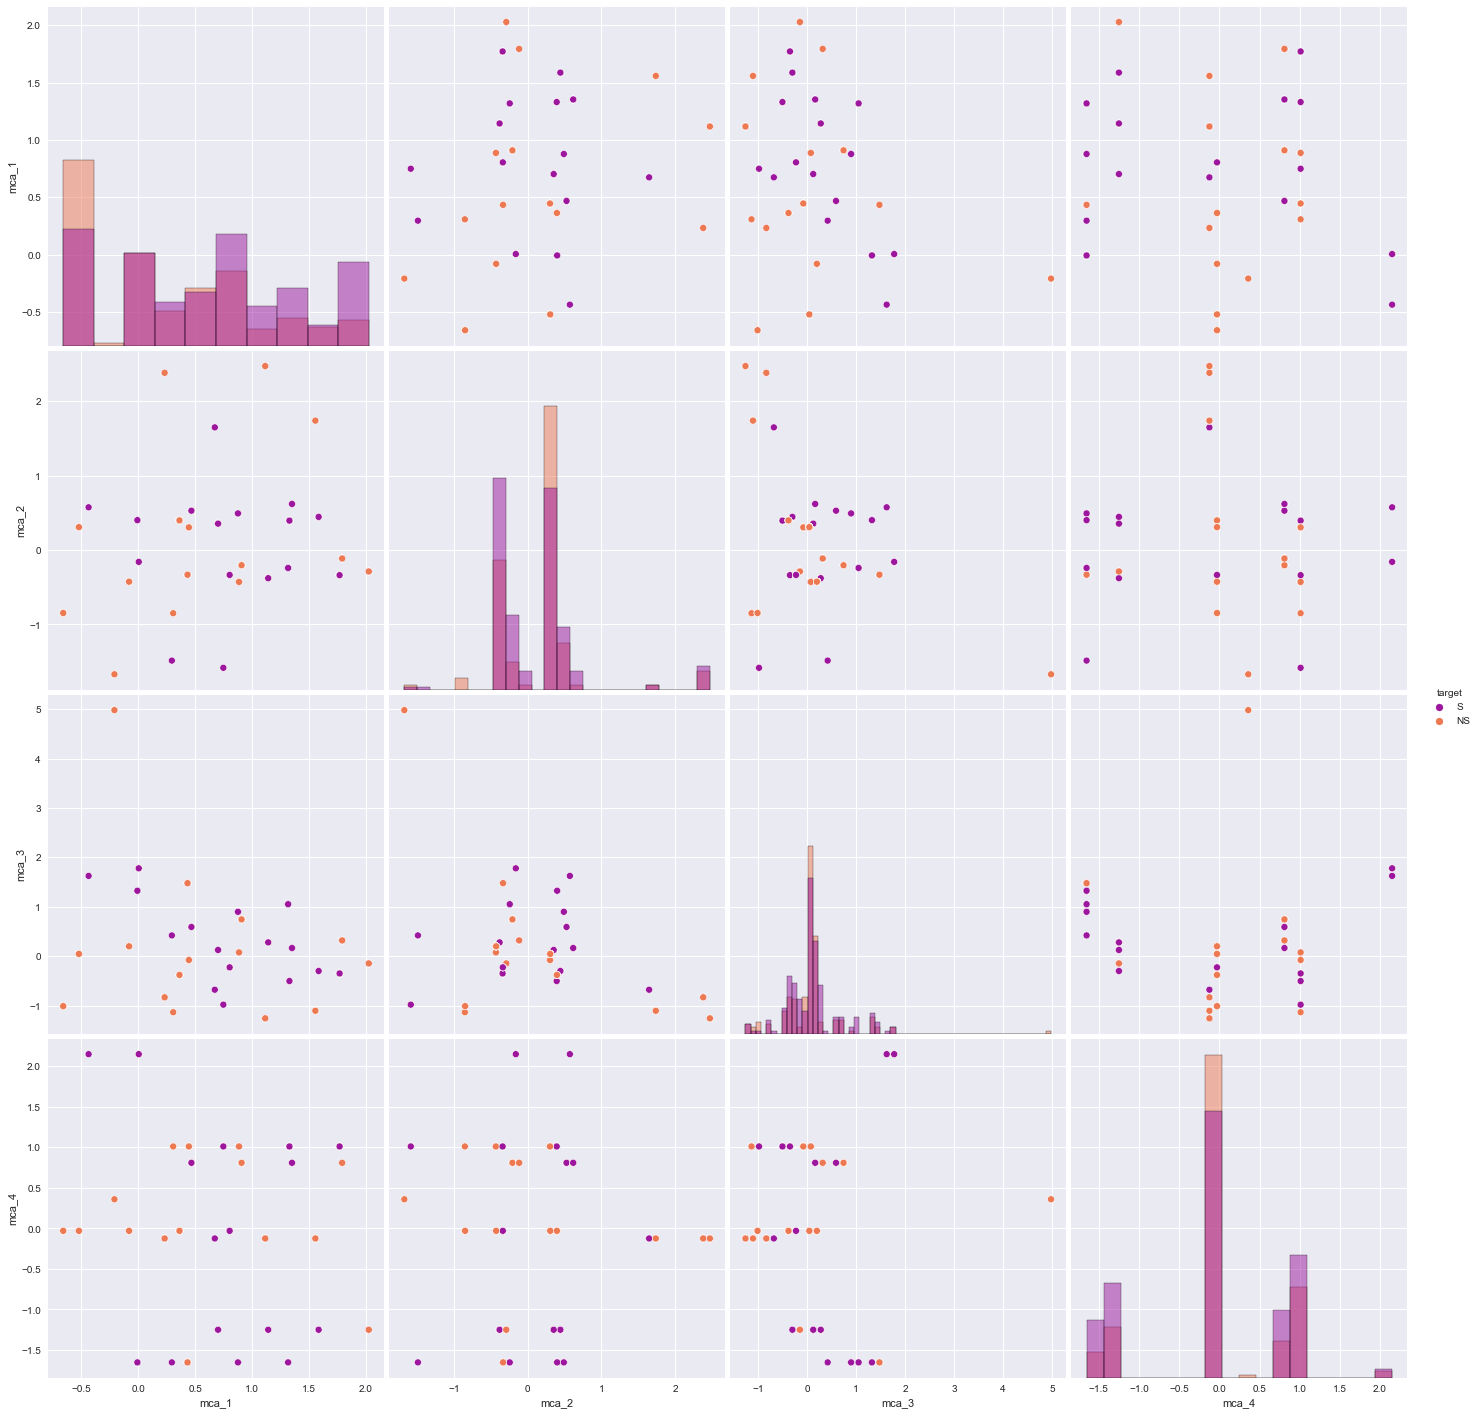

In [7]:
smp = sns.pairplot(mca_df[['mca_1','mca_2','mca_3','mca_4','target']].head(500),hue="target",diag_kind='hist',palette="plasma",height=5)
mca_df

In [13]:
religion_dict={0:'Catholic',1:'Other Christian',2:'Muslim',3:'Buddhist',4:'Hindu',5:'Ethnic',6:'Marxist',7:'Others'}

encoded = ['bars','stripes','red','green','blue','gold','white','black','orange','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text']

flags_df = pd.read_csv('DataSets/Flags.csv',delimiter=",")
display(flags_df)
flags_df = flags_df.set_index('country')
flags_df['religion'] = flags_df['religion'].apply(lambda row: religion_dict[row])
flags_df['religion'] = np.where(flags_df['religion'].isin(['Other Christian','Catholic']),'Roman',flags_df['religion'])

flags_df = flags_df[flags_df['religion'].isin(['Muslim','Roman'])]
for col in encoded:
    flags_df[col] = flags_df[col].apply(lambda row: 1 if row >=1 else 0)
flags_df[encoded]

,country,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


,bars,stripes,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
country,,,,,,,,,,,,,,,,,,,
Afghanistan,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
Algeria,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
American-Samoa,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0
Andorra,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Anguilla,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0
Vanuatu,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
Vatican-City,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0


,category,mca_1,mca_2,mca_3,mca_4
0,bars,-1.122737,-0.066823,-1.209138,-1.603638
1,stripes,-0.244222,0.065435,0.816331,-0.188304
2,red,-0.099108,0.100964,0.026938,-0.236597
3,green,-0.506348,-0.127907,-0.457529,0.274248
4,blue,0.452532,0.179064,0.352117,-0.229529
5,gold,-0.182727,-0.340989,0.093960,0.173001
6,white,0.068055,0.234139,0.037272,-0.180969
7,black,-0.662762,-0.512953,0.549520,-0.024450
8,orange,0.320287,-0.801428,-0.669373,0.095318
9,circles,0.312692,-0.065582,-0.431669,1.043196


Inercia: [0.30143287712611594, 0.25666924981846195, 0.23726656390250817, 0.20463130915291386]


,mca_1,mca_2,mca_3,mca_4,religion
Afghanistan,-0.367527,-0.147172,0.245937,0.144076,Muslim
Algeria,-0.958918,1.256156,-0.996564,0.095111,Muslim
American-Samoa,0.033965,-0.644343,0.075433,0.249709,Roman
Andorra,-0.425751,-0.061928,-0.371047,-1.029492,Roman
Anguilla,0.254029,-0.475964,0.025841,-0.025557,Roman
...,...,...,...,...,...
USA,0.371601,0.581435,0.451610,-0.147498,Roman
Vanuatu,-0.609996,-0.688049,0.337956,0.419631,Roman
Vatican-City,-0.540010,-0.441918,-0.280886,-0.559857,Roman
Venezuela,-0.123177,-0.376175,0.034150,0.166048,Roman


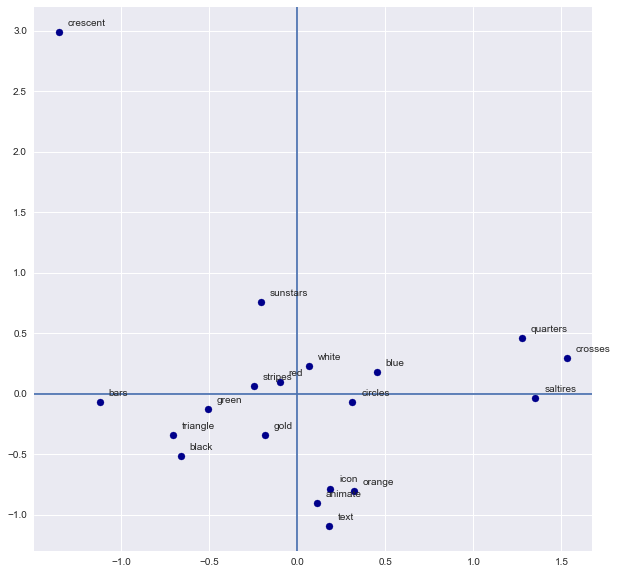

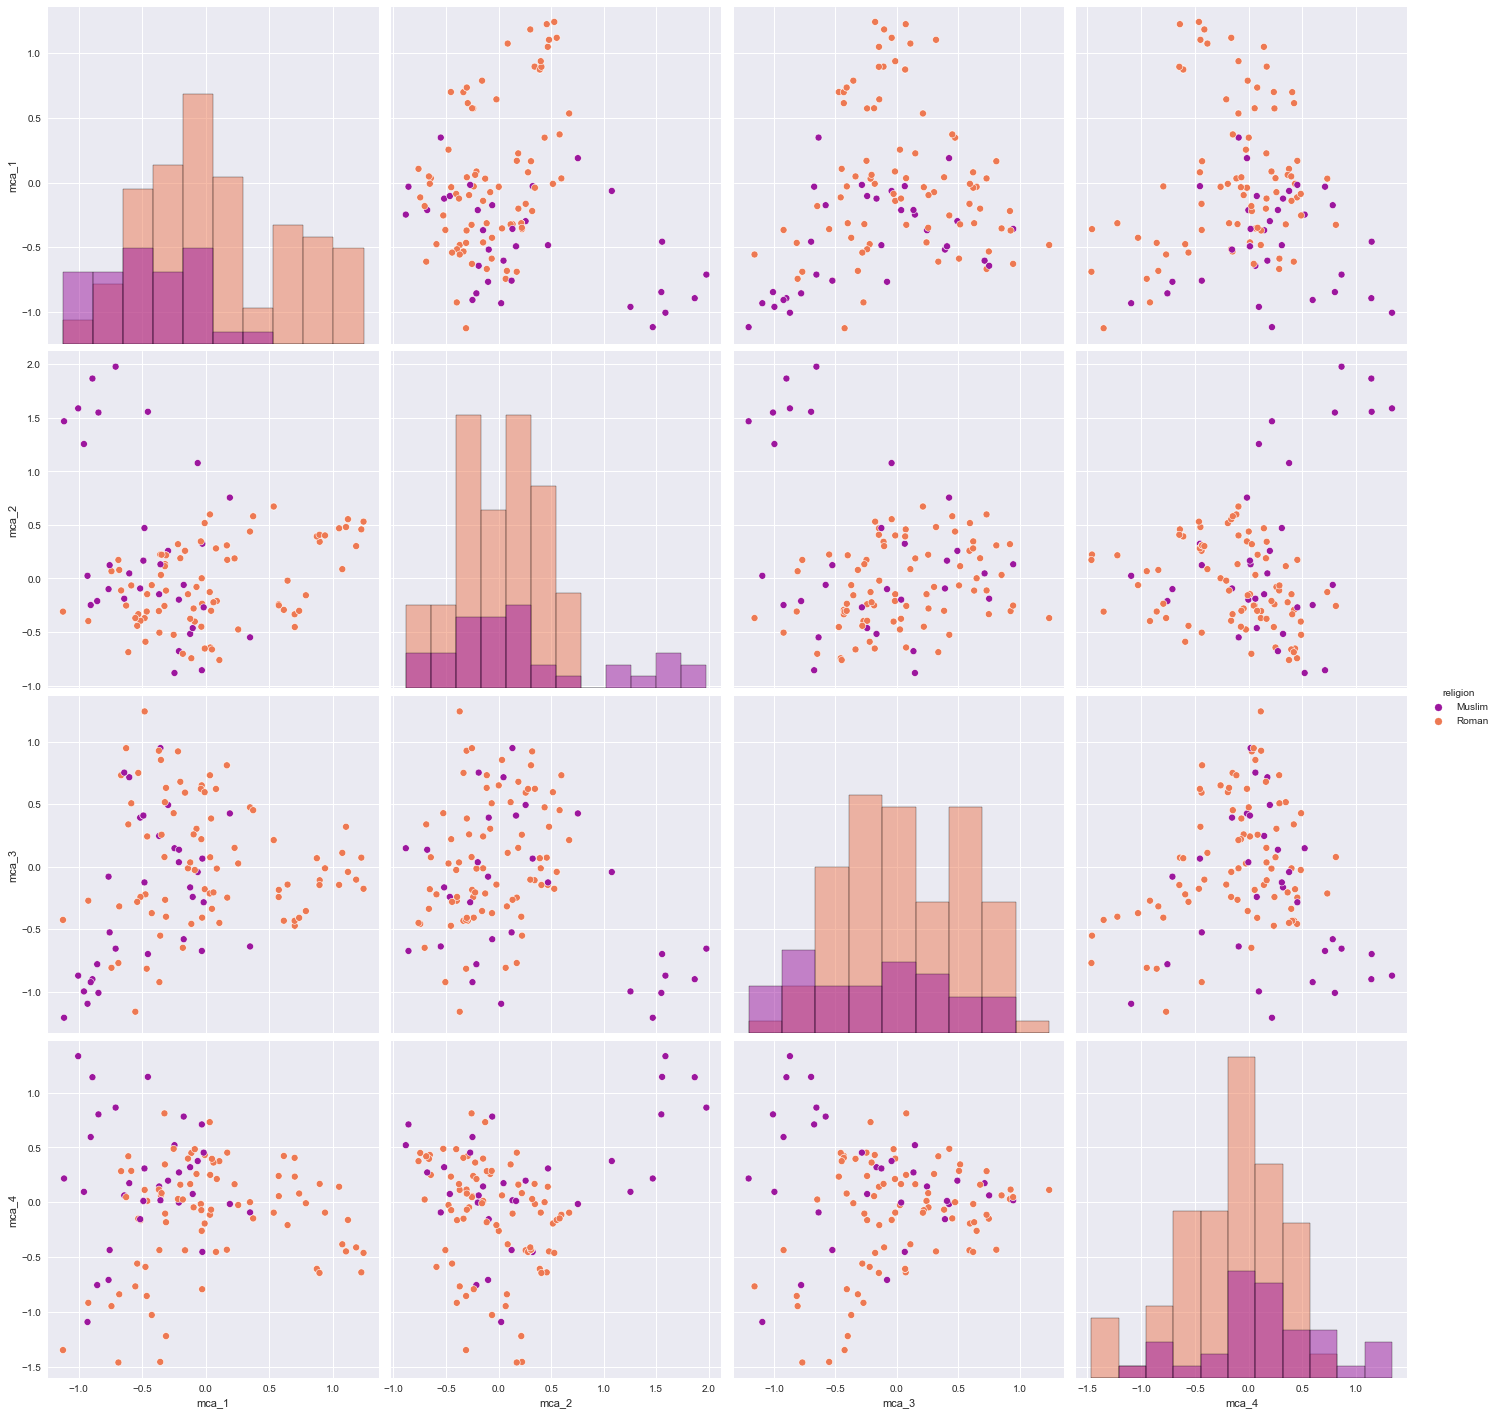

In [14]:
X = flags_df[encoded]
n_components = 4
mca_cols = ['mca_'+str(i+1) for i in range(0,n_components)]
mca_model = pr.MCA(n_components=n_components,
                   n_iter=10,
                   copy=True,
                   check_input=True,
                   engine='auto',
                   random_state=42).fit(X)

columns_profiles_df = mca_model.column_coordinates(X).reset_index()
columns_profiles_df.columns = ['category']+mca_cols
display(columns_profiles_df)
plt.figure(figsize=(10,10))
scatterPlot(plt,columns_profiles_df,'mca_1','mca_2',label='category')

print('Inercia:',[e/sum(mca_model.eigenvalues_) for e in mca_model.eigenvalues_ ])

mca_df = mca_model.row_coordinates(X)
mca_df.columns = mca_cols
mca_df['religion'] = flags_df['religion']
smp = sns.pairplot(mca_df,hue="religion",diag_kind='hist',palette="plasma",height=5)
mca_df